In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INDEX     776 non-null    int64  
 1   SHOOTER   776 non-null    object 
 2   X         776 non-null    float64
 3   Y         776 non-null    float64
 4   RANGE     776 non-null    object 
 5   DEFENDER  776 non-null    object 
 6   SCORE     776 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 42.6+ KB


In [ ]:
data = pd.read_csv("nba_players_shooting.csv")
data.info()

In [2]:
data.head()

,INDEX,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
0,0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE
1,1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE
2,2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE
3,3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE
4,4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE


In [3]:
X = data["X"]
Y = data["Y"]

In [4]:
string_to_binary = {'MADE': 1, 'MISSED': 0}
#string_to_binary = {'TRUE': 1, 'FALSE': 0}
# Apply the mapping to create a new binary column
data['SCORE'] = data['SCORE'].map(string_to_binary)

In [5]:
categorical = {'Seth Curry': 3, 'Chris Paul': 2, 'Russell Westbrook': 1, 'Trae Young': 0}
data['SHOOTER'] = data['SHOOTER'].map(categorical)

In [6]:
data

,INDEX,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
0,0,3,-3.808987,5.583621,"(0, 4)",Chris Paul,1
1,1,3,-0.104279,5.919138,"(0, 4)",Trae Young,1
2,2,3,-0.525864,8.912239,"(0, 4)",Trae Young,1
3,3,3,-0.790616,7.503782,"(0, 4)",Chris Paul,1
4,4,3,2.119074,5.320534,"(0, 4)",Trae Young,1
...,...,...,...,...,...,...,...
771,771,0,23.952742,15.324875,"(25, 29)",Russell Westbrook,0
772,772,0,6.221766,30.756008,"(25, 29)",Seth Curry,0
773,773,0,16.397467,27.660323,"(25, 29)",Chris Paul,0
774,774,0,-11.257104,30.713097,"(25, 29)",Russell Westbrook,0


In [7]:
data[['first_part', 'second_part']] = data['RANGE'].str.split(',', expand=True)

In [8]:
data = data.drop(columns="RANGE")
data = data.drop(columns="first_part")
data['RANGE'] = data['second_part'].str[:-1]
data = data.drop(columns="second_part")
data = data.drop(columns="DEFENDER")
data['RANGE'] = pd.to_numeric(data['RANGE']).astype('Int64')

In [9]:
condition1 = (data['SHOOTER'] == 3)
#condition2 = (data['SCORE'] == 1)
condition3 = (data['RANGE'] >= 24)

# Combine conditions using logical AND (&)
combined_condition = condition1 & condition3 #& condition2
filtered_df = data[combined_condition]

In [10]:
X = filtered_df["X"]
Y = filtered_df["Y"]
#filtered_df

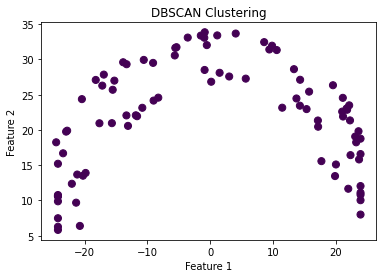

In [11]:
#filtered_df
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate some sample data (you can replace this with your dataset)
#X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labelss = dbscan.fit_predict(filtered_df)

# Plot the results
#plt.scatter(data[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(filtered_df["X"], filtered_df["Y"], c=labelss, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

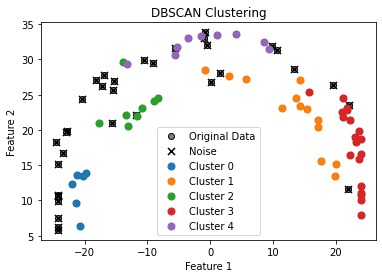

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate synthetic data
#X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
labelss = dbscan.fit_predict(filtered_df)

# Plot the original data
plt.scatter(filtered_df["X"], filtered_df["Y"], c='gray', label='Original Data', edgecolors='k')

# Plot the clustered data using different colors for each cluster
unique_labels = np.unique(labelss)
for label in unique_labels:
    if label == -1:
        # Outliers (noise points) are red
        plt.scatter(X[labelss == label], Y[labelss == label], c='black', marker='x', label='Noise', s=50)
    else:
        # Inliers (clustered points) have different colors
        plt.scatter(X[labelss == label], Y[labelss == label], label=f'Cluster {label}', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Extra

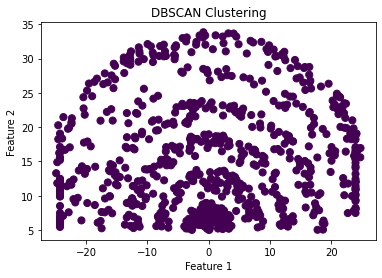

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate some sample data (you can replace this with your dataset)
#X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

# Plot the results
#plt.scatter(data[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(X, Y, c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()